In [1]:
# Install Libraries
!pip install tensorflow keras opencv-python scikit-learn matplotlib

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image dimensions
IMG_SIZE = 224
BATCH_SIZE = 32

# Path to the dataset
dataset_path = r'C:\Users\HP\Downloads\archive (4)\garbage_classification'

# Categories (classes) of garbage (optional, for reference)
categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass',
              'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']

# Apply data augmentation to the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Split the data into 80% training and 20% validation
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create the training generator with augmentation
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize all images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='categorical',  
    subset='training' 
)

# Create the validation generator without augmentation
validation_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),  
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='validation' 
)

# Shape of the training and validation batches
print(f"Training data: {train_generator.samples} samples")
print(f"Validation data: {validation_generator.samples} samples")


Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.
Training data: 12415 samples
Validation data: 3100 samples


Shape of augmented labels: (32, 12)
First few labels: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


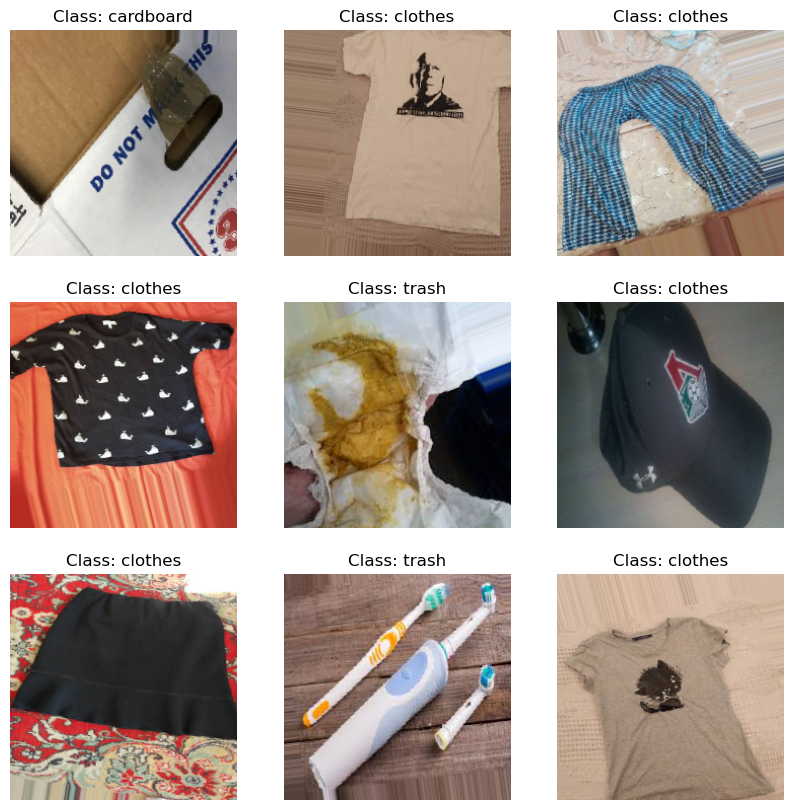

In [10]:
# Display some augmented images with class names
augmented_images, augmented_labels = next(train_generator)

# Get the class indices (mapping of class names to numeric labels)
class_indices = train_generator.class_indices

# Reverse the class_indices dictionary to map numeric labels to class names
idx_to_class = {v: k for k, v in class_indices.items()}

# Check the shape of augmented_labels to confirm its format
print(f"Shape of augmented labels: {augmented_labels.shape}")
print(f"First few labels: {augmented_labels[:5]}")  # Print the first few labels for debugging

# Plot the augmented images with class names
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])

    # Extract scalar value from augmented_labels[i]
    # If the labels are in sparse format (integer), directly convert them
    if train_generator.class_mode == 'sparse':
        label = int(augmented_labels[i])
    # If the labels are in categorical format (one-hot encoded), use np.argmax to get the correct label
    elif train_generator.class_mode == 'categorical':
        label = np.argmax(augmented_labels[i])
    else:
        label = "Unknown"

    # Get the class name from the label
    class_name = idx_to_class.get(label, "Unknown")
    
    # Display the class name as the title
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.show()



In [11]:
#Model training using MobileNetV2
 

In [12]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os

In [13]:
# Define parameters
image_size = (224, 224)  # Image size for MobileNetV2
num_classes = 12  # Number of classes

In [16]:
# Load MobileNetV2 architecture with pretrained weights
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [17]:
# Freeze the base model layers
base_model.trainable = False

In [18]:
# Adding custom layers on top of MobileNetV2
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for 12 classes
])

In [19]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model using existing data generators
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
388/388 [==============================] - 992s 3s/step - loss: 0.4248 - accuracy: 0.8697 - val_loss: 0.3361 - val_accuracy: 0.8874
Epoch 2/20
388/388 [==============================] - 903s 2s/step - loss: 0.2292 - accuracy: 0.9253 - val_loss: 0.3176 - val_accuracy: 0.8884
Epoch 3/20
388/388 [==============================] - 773s 2s/step - loss: 0.1883 - accuracy: 0.9381 - val_loss: 0.2817 - val_accuracy: 0.9090
Epoch 4/20
388/388 [==============================] - 795s 2s/step - loss: 0.1607 - accuracy: 0.9482 - val_loss: 0.2962 - val_accuracy: 0.9065
Epoch 5/20
388/388 [==============================] - 785s 2s/step - loss: 0.1386 - accuracy: 0.9515 - val_loss: 0.3405 - val_accuracy: 0.8981
Epoch 6/20
388/388 [==============================] - 796s 2s/step - loss: 0.1292 - accuracy: 0.9550 - val_loss: 0.3278 - val_accuracy: 0.9029
Epoch 7/20
388/388 [==============================] - 782s 2s/step - loss: 0.1097 - accuracy: 0.9625 - val_loss: 0.2948 - val_accuracy: 0.9174

In [21]:
# Save the trained model
model.save('garbage_classification_mobilenetv2.h5')

In [22]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

97/97 [==============================] - 118s 1s/step - loss: 0.4065 - accuracy: 0.9110
Validation Accuracy: 91.10%
